# Importing Required Libraries

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [8]:
# extracting the data from the subfolders
data = image_dataset_from_directory("IndianCurrencyNotesDataset/AllImages/",
                                    labels='inferred',
                                    label_mode='categorical',
                                    shuffle=True,
                                    seed=123,
                                    batch_size=32,
                                    image_size=(224, 224))

Found 177 files belonging to 7 classes.


In [12]:
# splitting the data into training and testing
train_size = int(0.8 * len(data))
test_size = int(0.2 * len(data))

train_data = data.take(train_size)
test_data = data.skip(train_size)
test_data = data.take(test_size)

In [13]:
# doing data augmentation on the training data with resizing and rotation
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.Resizing(224, 224),
    layers.experimental.preprocessing.Rescaling(1./255)
])

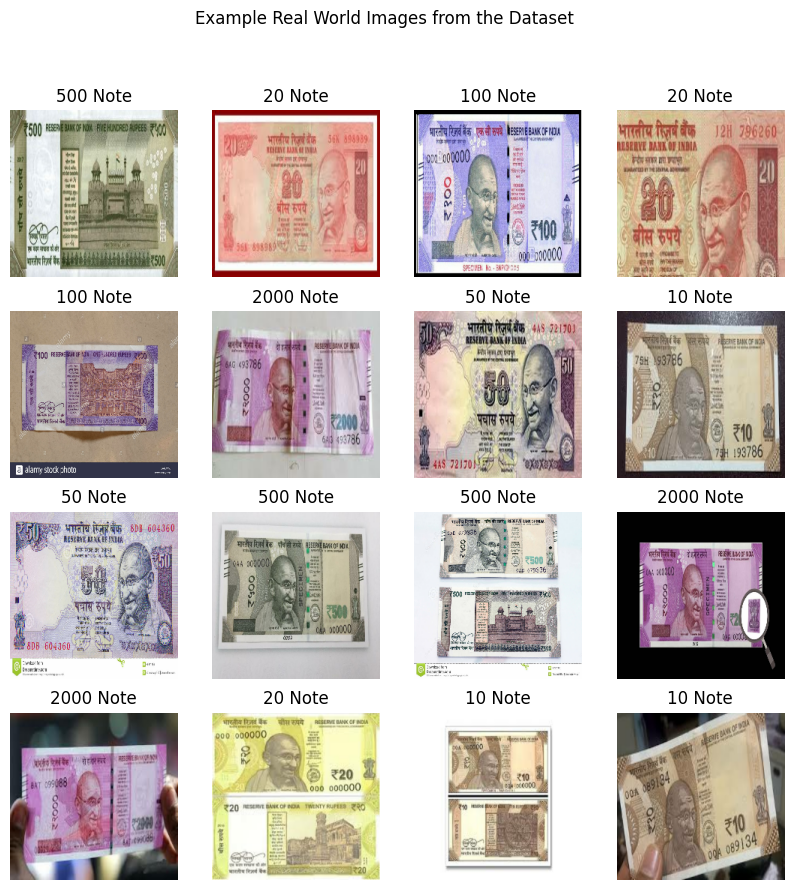

In [21]:
class_names = data.class_names

# displaying few samples from the training data with their class labels
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

plt.suptitle("Example Real World Images from the Dataset")
plt.show()

In [24]:
train_data = train_data.map(lambda x, y: (data_augmentation(x), y))

In [40]:
# Load pretrained ResNet50 model and extract features using this pretrained network. Store the extracted features and its labels in two separate list.

# loading the pretrained ResNet50 model
model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

In [42]:
def extract_features(img_batch):
    img_batch = preprocess_input(img_batch)
    features = model.predict(img_batch)
    return features.reshape((len(img_batch), -1))

In [35]:
# calculating the accuracy of the model
accuracy = accuracy_score(np.argmax(test_labels, axis=1), predictions)
print("Accuracy of the model: ", accuracy)

Accuracy of the model:  0.09375
